# **Clasificación Multiclase con Scikit-Learn sobre el Dataset Diamonds**

In [7]:
# importamos las librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

### **Estadísticas del Dataset**

In [8]:
# importamos diamonds.csv usando pandas
df = pd.read_csv('diamonds.csv')

# imprimimos las primeras 5 filas, la descripcion y la informacion del dataset
print(df.head())
print(df.describe())
print(df.info())


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000  

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [10]:
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


### **Limpieza de datos**

In [11]:
# vemos si hay valores nulos y/o faltantes
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [12]:
# vemos si hay valores cero en las columnas x, y, z
print("Valores 0 en columnas x, y, z:")
print((df[['x', 'y', 'z']] == 0).sum())

Valores 0 en columnas x, y, z:
x     8
y     7
z    20
dtype: int64


In [13]:
# eliminamos los valores 0 en las columnas x, y, z

df = df[(df[['x','y','z']] != 0).all(axis=1)]

# verificamos si se eliminaron los valores 0

print('x:', len(df.loc[df['x'] == 0]))

print('y:', len(df.loc[df['y'] == 0]))

print('z:', len(df.loc[df['z'] == 0]))



x: 0
y: 0
z: 0


In [14]:
# vemos si hay duplicados y los eliminamos

print('Hay', df.duplicated().sum(), 'filas duplicadas')
df.drop_duplicates(inplace=True)

Hay 145 filas duplicadas


In [15]:
df.duplicated().sum()

np.int64(0)

### **Análisis Exploratorio de Datos**

C:\Users\User\AppData\Local\Temp\ipykernel_19412\35689400.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='cut', palette='viridis')


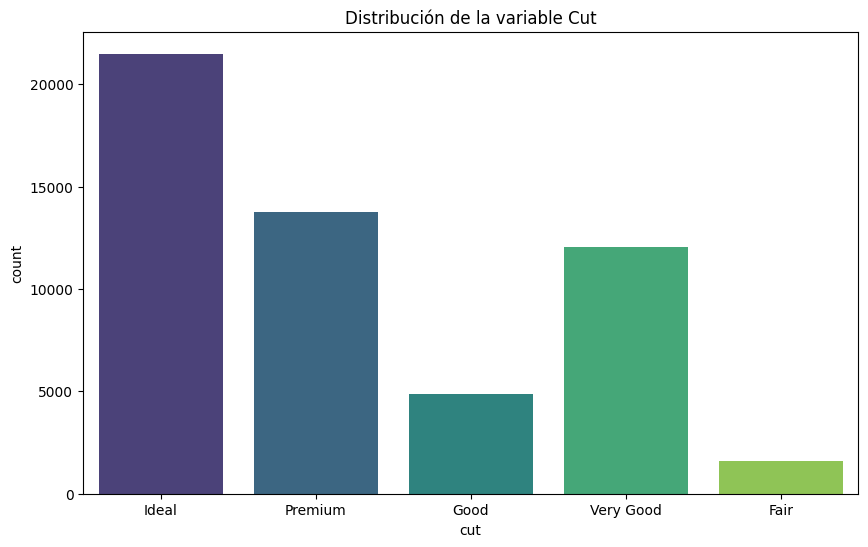

In [16]:
# Distribución de la variable 'cut'

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='cut', palette='viridis')
plt.title('Distribución de la variable Cut')
plt.show()



<Figure size 1500x1000 with 0 Axes>

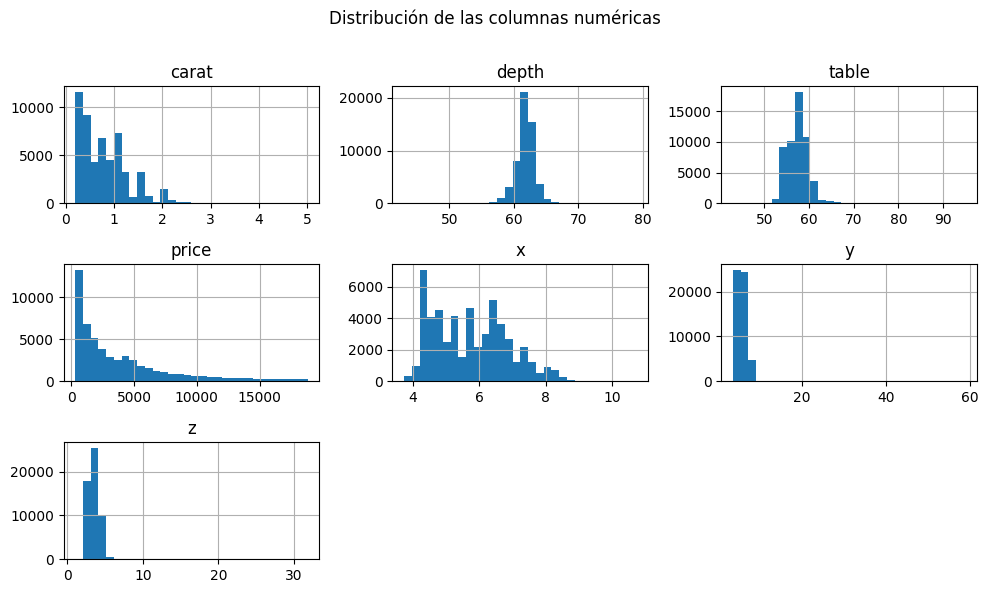

In [17]:
# Vemos histograma de todas las columnas numéricas, para ver la distribución de los datos

plt.figure(figsize=(15, 10))
df.select_dtypes(include=['float64', 'int64']).hist(grid=True, bins=30, figsize=(10, 6))
plt.suptitle('Distribución de las columnas numéricas')
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19412\10139162.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cut', y='carat', palette='viridis')


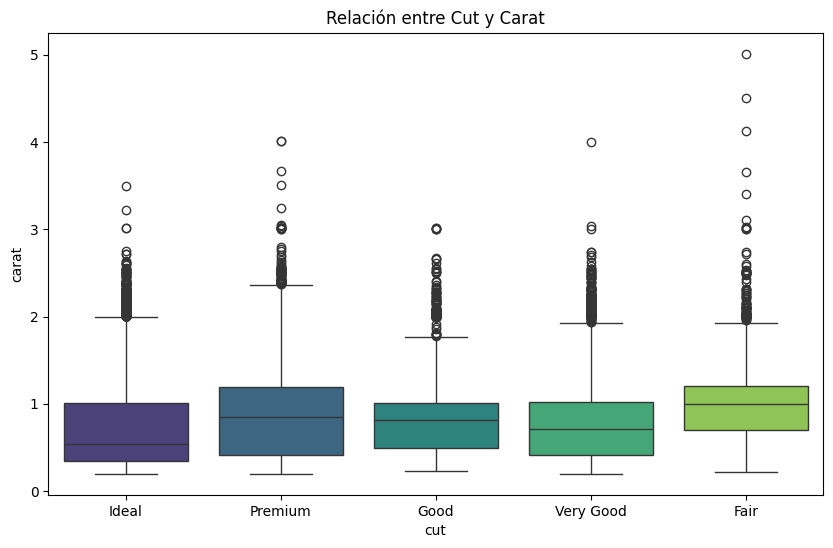

In [18]:
# Vemos la relación entre 'Cut' y 'carat'

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='carat', palette='viridis')
plt.title('Relación entre Cut y Carat')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_19412\1866909002.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='cut', y='price', palette='viridis')


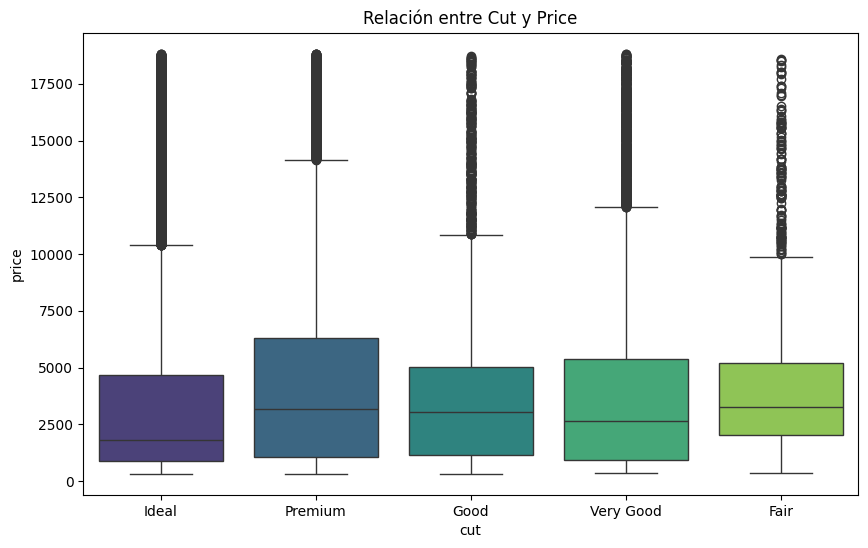

In [19]:
# Vemos la relación entre 'Cut' y 'price'

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price', palette='viridis')
plt.title('Relación entre Cut y Price')
plt.show()

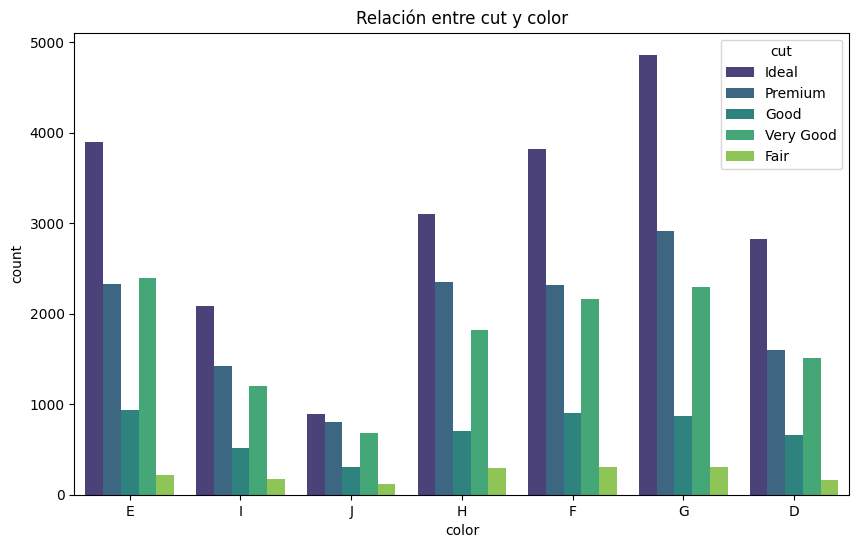

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='color', hue='cut', palette='viridis')
plt.title('Relación entre cut y color')
plt.show()

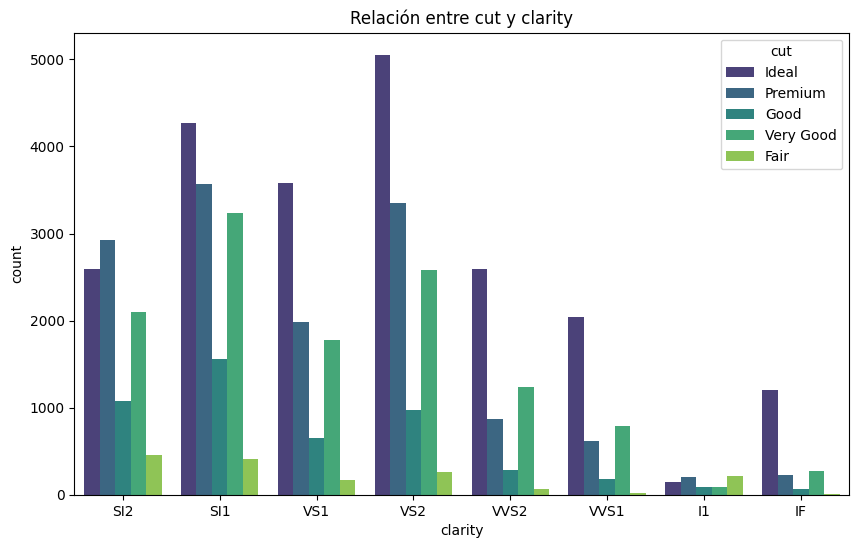

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='clarity', hue='cut', palette='viridis')
plt.title('Relación entre cut y clarity')
plt.show()

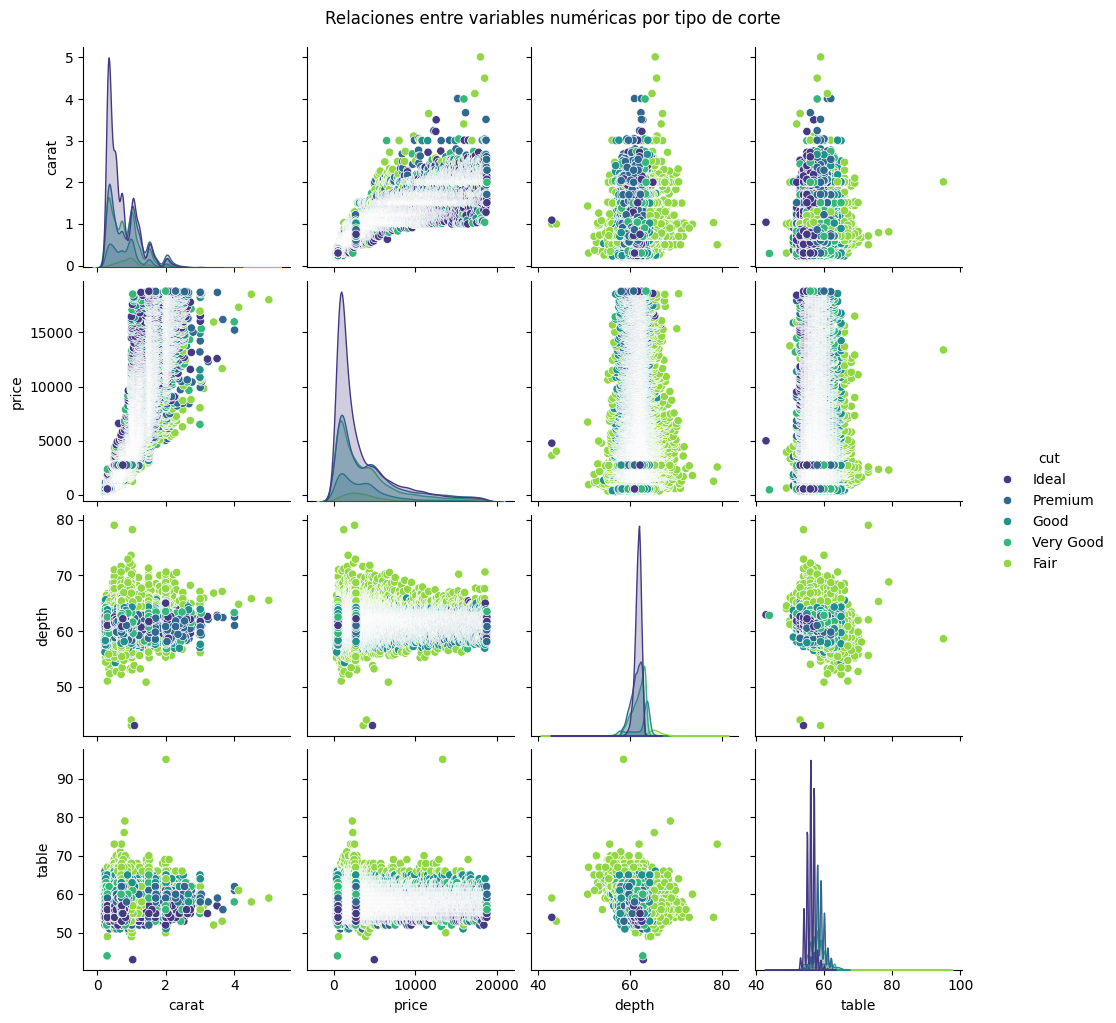

In [22]:
# Pairplot de variables relevantes con hue='cut'
sns.pairplot(df[['carat', 'price', 'depth', 'table', 'cut']], hue='cut', palette='viridis')
plt.suptitle('Relaciones entre variables numéricas por tipo de corte', y=1.02)
plt.show()

### **Preprocesamiento de Datos**

In [23]:
# vamos a copiar el datasat para trabajar sobre las variables categóricas

df_cat = df.copy()
df_cat["cut"] = df_cat["cut"].replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5})
df_cat["color"] = df_cat["color"].replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7})
df_cat["clarity"] = df_cat["clarity"].replace({"I1": 1, "SI2": 2, "SI1": 3, "VS2": 4, "VS1": 5, "VVS2": 6, "VVS1": 7, "IF": 8})

# generamos una leyenda para las variables categóricas

cut = {1: "Fair", 2: "Good", 3: "Very Good", 4: "Premium", 5: "Ideal"}
color = {1: "J", 2: "I", 3: "H", 4: "G", 5: "F", 6: "E", 7: "D"}
clarity = {1: "I1", 2: "SI2", 3: "SI1", 4: "VS2", 5: "VS1", 6: "VVS2", 7: "VVS1", 8: "IF"}

# vemos las primeras 5 filas
print(df_cat.head())


   carat  cut  color  clarity  depth  table  price     x     y     z
0   0.23    5      6        2   61.5   55.0    326  3.95  3.98  2.43
1   0.21    4      6        3   59.8   61.0    326  3.89  3.84  2.31
2   0.23    2      6        5   56.9   65.0    327  4.05  4.07  2.31
3   0.29    4      2        4   62.4   58.0    334  4.20  4.23  2.63
4   0.31    2      1        2   63.3   58.0    335  4.34  4.35  2.75


C:\Users\User\AppData\Local\Temp\ipykernel_19412\805060375.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat["cut"] = df_cat["cut"].replace({"Fair": 1, "Good": 2, "Very Good": 3, "Premium": 4, "Ideal": 5})
C:\Users\User\AppData\Local\Temp\ipykernel_19412\805060375.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_cat["color"] = df_cat["color"].replace({"J": 1, "I": 2, "H": 3, "G": 4, "F": 5, "E": 6, "D": 7})
C:\Users\User\AppData\Local\Temp\ipykernel_19412\805060375.py:6: FutureWarning: Downcasting behavior in `repla

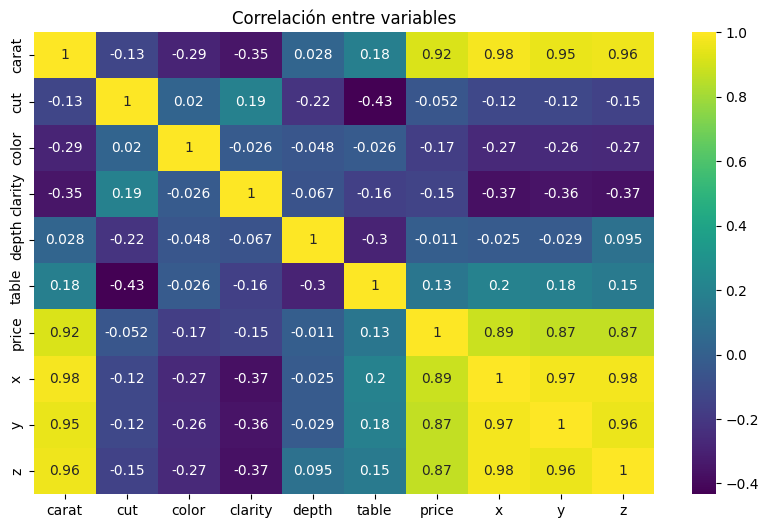

In [24]:
# veaemos la correlación entre las variables con un heatmap

plt.figure(figsize=(10, 6))
sns.heatmap(df_cat.corr(), annot=True, cmap='viridis') 
plt.title('Correlación entre variables')
plt.show()

-Vemos la correlación entre variables para ver si hay algún posible impacto en 'cut'
-Las únicas correlaciones positivas son con 'carat', clarity y color.

In [25]:
# Se define 'cut' como variable objetivo

X = df.drop('cut', axis=1)
y = df['cut']

# Se definen las columnas númericas y categóricas

categorical_columns = ['color', 'clarity']
numerical_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Preprocesamiento de datos

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_columns),
    ('cat', OneHotEncoder(), categorical_columns)
])

# particionamiento de datos

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Veamos el tamaño de los datasets

print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)



X_train: (43020, 9)
X_test: (10755, 9)
y_train: (43020,)
y_test: (10755,)


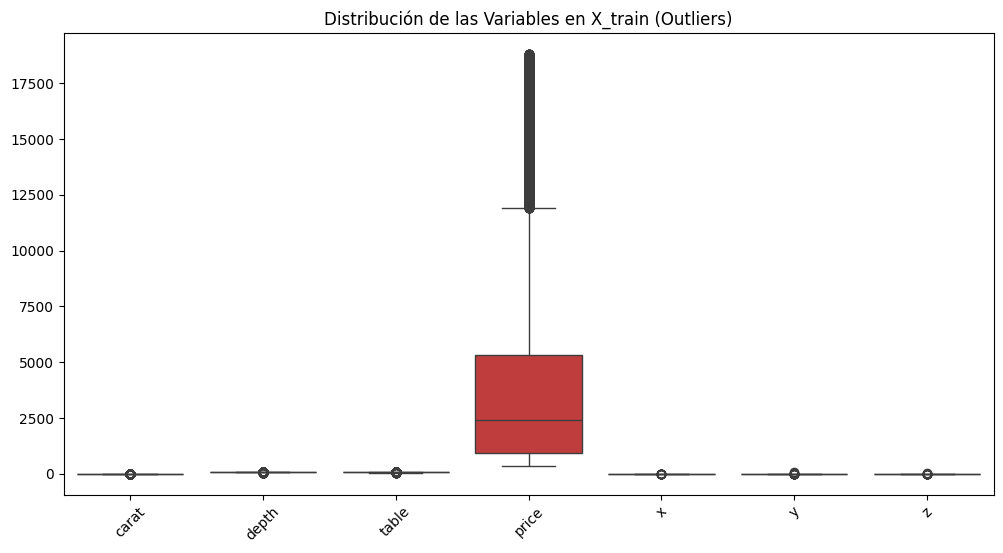

In [26]:
# Boxplot de las variables antes del entrenamiento
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_train)
plt.xticks(rotation=45)
plt.title("Distribución de las Variables en X_train (Outliers)")
plt.show()

Vemos que el escalado era necesario porque la diferencia es enorme entre price y las demás variables.

### **Modelado**

#### **Regresión Logística**

In [27]:
# regresión logística

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000, random_state=42))
])

lr_pipeline.fit(X_train, y_train)
y_pred = lr_pipeline.predict(X_test)

print("\n Métricas \n")
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Precision: ", precision_score(y_test, y_pred, average='weighted'))  
print("Recall: ", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_pred, average='weighted')) 
print("\n")
print("Classification Report: \n", classification_report(y_test, y_pred))
print("\n")


c:\Users\User\OneDrive - UNIR\Documentos\UNIR - DataSCience & IA\Actividades\Actividad 04\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



 Métricas 

Accuracy:  0.6572756857275686
Precision:  0.6458059090723
Recall:  0.6572756857275686
F1 Score:  0.6341192088315302


Classification Report: 
               precision    recall  f1-score   support

        Fair       0.73      0.47      0.57       324
        Good       0.60      0.14      0.22      1011
       Ideal       0.73      0.87      0.79      4348
     Premium       0.67      0.71      0.69      2776
   Very Good       0.47      0.44      0.46      2296

    accuracy                           0.66     10755
   macro avg       0.64      0.53      0.55     10755
weighted avg       0.65      0.66      0.63     10755





#### **Random Forest Classifier**

Accuracy:  0.7785216178521618
Precision:  0.7713847164964899

 Classsification Report:
              precision    recall  f1-score   support

        Fair       0.92      0.87      0.90       324
        Good       0.79      0.69      0.74      1011
       Ideal       0.83      0.92      0.87      4348
     Premium       0.75      0.81      0.78      2776
   Very Good       0.66      0.50      0.57      2296

    accuracy                           0.78     10755
   macro avg       0.79      0.76      0.77     10755
weighted avg       0.77      0.78      0.77     10755



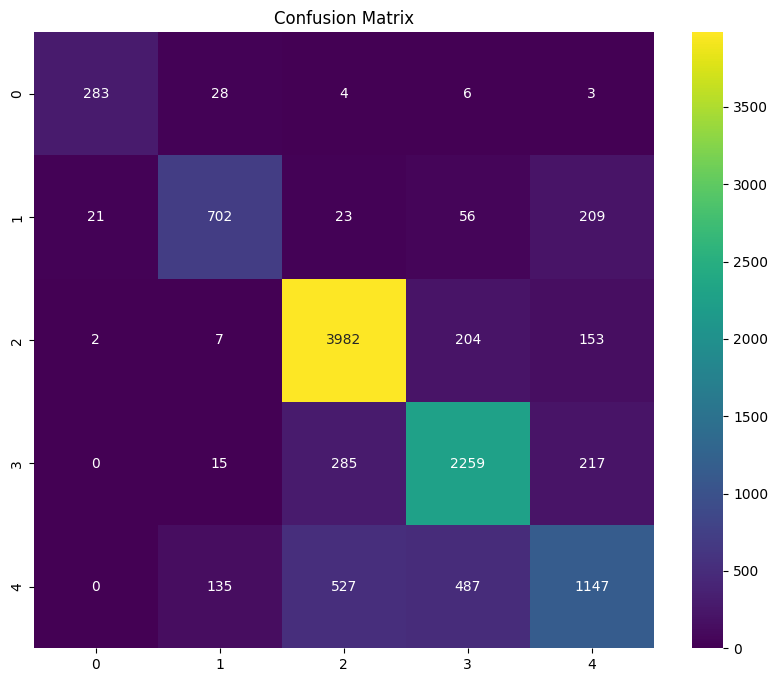

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
]) 

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf, average='weighted'))
print("\n Classsification Report:")
print(classification_report(y_test, y_pred_rf))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

#### **SVM Classifier**

Accuracy:  0.7507205950720595

 Classsification Report:
              precision    recall  f1-score   support

        Fair       0.91      0.78      0.84       324
        Good       0.72      0.58      0.64      1011
       Ideal       0.81      0.92      0.86      4348
     Premium       0.74      0.80      0.77      2776
   Very Good       0.59      0.44      0.51      2296

    accuracy                           0.75     10755
   macro avg       0.75      0.71      0.72     10755
weighted avg       0.74      0.75      0.74     10755



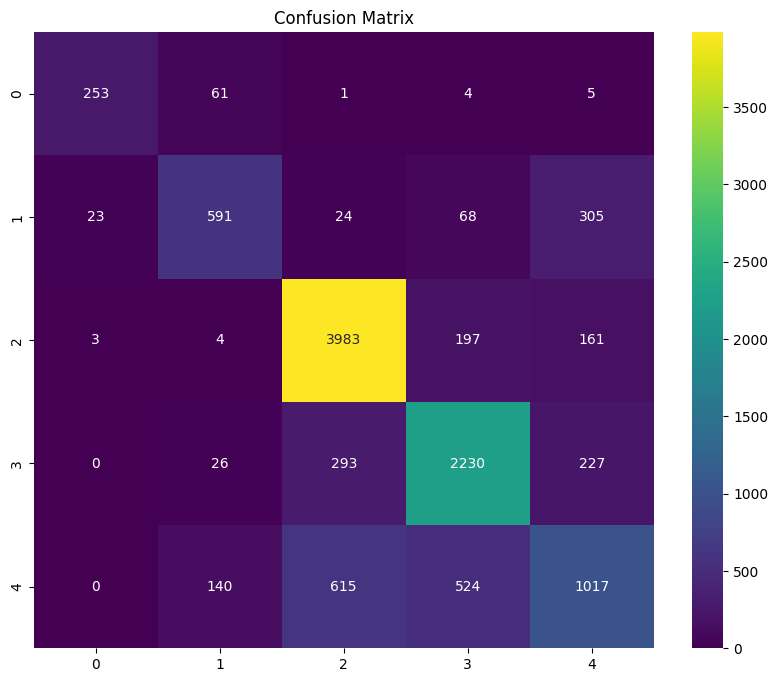

In [29]:
from sklearn.svm import SVC

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(random_state=42))
])

svm_pipeline.fit(X_train, y_train)
y_pred_svm = svm_pipeline.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred_svm))
print("\n Classsification Report:")
print(classification_report(y_test, y_pred_svm))

plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis')
plt.title('Confusion Matrix')
plt.show()

#### **KNN Classifier**

In [30]:
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# Se usará RandomizedSearchCV para encontrar los mejores hiperparámetros

from sklearn.model_selection import RandomizedSearchCV

hyperparams = {
    'classifier__n_neighbors': range(1, 20),
    'classifier__weights': ['uniform', 'distance'],
    'classifier__metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_random = RandomizedSearchCV(knn_pipeline, param_distributions=hyperparams, n_iter=50, cv=5, random_state=42, n_jobs=-1)

knn_random.fit(X_train, y_train)

print("Mejores hiperparámetros: ", knn_random.best_params_)
print("Mejor Score: ", knn_random.best_score_)

print(classification_report(y_test, knn_random.predict(X_test)))

c:\Users\User\OneDrive - UNIR\Documentos\UNIR - DataSCience & IA\Actividades\Actividad 04\.venv\Lib\site-packages\sklearn\model_selection\_search.py:1108: UserWarning: One or more of the test scores are non-finite: [0.6341934  0.6341934         nan 0.65381218 0.65739191 0.63630869
        nan        nan 0.63856346 0.64676894 0.66148303 0.66092515
 0.63847048 0.66092515 0.66139005 0.61057648        nan 0.662808
 0.63049744 0.64862854 0.65825198 0.65183636 0.65739191 0.66032078
 0.65337053 0.65973966 0.66197118 0.66148303        nan 0.66032078
 0.63561134 0.65183636 0.66218038 0.66271502 0.64172478 0.6606927
        nan 0.65309159 0.66271502        nan 0.63049744 0.64951185
        nan 0.60904231 0.65973966 0.66113436 0.65708973 0.66273826
        nan 0.63847048]
  warnings.warn(
c:\Users\User\OneDrive - UNIR\Documentos\UNIR - DataSCience & IA\Actividades\Actividad 04\.venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical 

Mejores hiperparámetros:  {'classifier__weights': 'uniform', 'classifier__n_neighbors': 14, 'classifier__metric': 'euclidean'}
Mejor Score:  0.6628079962807997
              precision    recall  f1-score   support

        Fair       0.89      0.61      0.72       324
        Good       0.61      0.45      0.52      1011
       Ideal       0.76      0.92      0.83      4348
     Premium       0.62      0.75      0.68      2776
   Very Good       0.44      0.24      0.31      2296

    accuracy                           0.68     10755
   macro avg       0.67      0.59      0.61     10755
weighted avg       0.65      0.68      0.65     10755



In [31]:
# Comparamos los modelos

models = {
    'Logistic Regression': lr_pipeline,
    'Random Forest': rf_pipeline,
    'SVM': svm_pipeline,
    'KNN': knn_random
}

for name, model in models.items():
    print(name)
    print(classification_report(y_test, model.predict(X_test)))
    print("\n")


Logistic Regression
              precision    recall  f1-score   support

        Fair       0.73      0.47      0.57       324
        Good       0.60      0.14      0.22      1011
       Ideal       0.73      0.87      0.79      4348
     Premium       0.67      0.71      0.69      2776
   Very Good       0.47      0.44      0.46      2296

    accuracy                           0.66     10755
   macro avg       0.64      0.53      0.55     10755
weighted avg       0.65      0.66      0.63     10755



Random Forest
              precision    recall  f1-score   support

        Fair       0.92      0.87      0.90       324
        Good       0.79      0.69      0.74      1011
       Ideal       0.83      0.92      0.87      4348
     Premium       0.75      0.81      0.78      2776
   Very Good       0.66      0.50      0.57      2296

    accuracy                           0.78     10755
   macro avg       0.79      0.76      0.77     10755
weighted avg       0.77      0.78      0.

#### Peso de las Características ####

C:\Users\User\AppData\Local\Temp\ipykernel_19412\269537144.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_importance, x='Importance', y='Feature', palette='viridis')


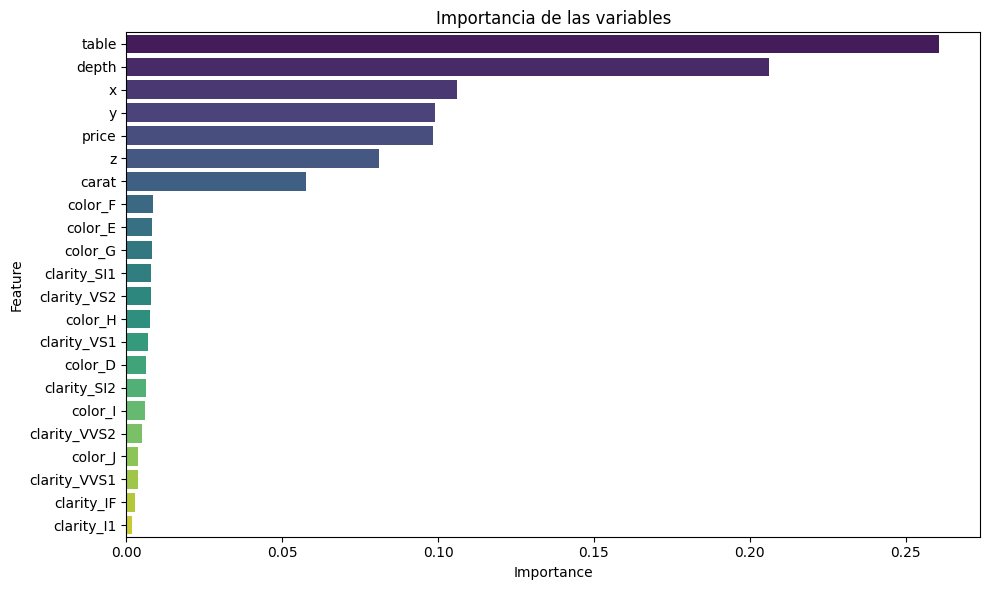

In [34]:
rf_model = rf_pipeline.named_steps['classifier']
feature_importances = rf_model.feature_importances_
col_names = numerical_columns.copy()
col_names.extend(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_columns))

df_importance = pd.DataFrame({
    'Feature': col_names,
    'Importance': feature_importances
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=df_importance, x='Importance', y='Feature', palette='viridis')
plt.title('Importancia de las variables')
plt.tight_layout()
plt.show()

- Se han utilizado 4 modelos de clasificación para predecir el 'cut' de los diamantes.
- Random Forest es el modelo que mejor predice el 'cut' de los diamantes con un acierto del 78%
- Las características más importantes para predecir el 'cut' de los diamantes son 'table' y 'depth'.
- Color y Clarity eb conjunto también son importantes para predecir el 'cut' de los diamantes.
- El uso de OneHotEncoder para las cariables categóricas ha mejorado el rendimiento de los modelos.
- El escalado ha sido necesario para evitar que las variables con valores más altos dominen el modelo.